# 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
sample = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
sample

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [3]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
x = train.drop('label', axis=1)
y = train['label']

In [7]:
test.keys()
train.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
y_test.head()

5457     8
38509    1
25536    9
31803    9
39863    8
Name: label, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
#PCA
#from sklearn.decomposition import PCA
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score

'''for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)

    knn = KNeighborsClassifier()

    knn.fit(x_train_trf,y_train)
    y_pred= knn.predict(x_test_trf)

    print(accuracy_score(y_pred,y_test))'''

'for i in range(1,785):\n    pca = PCA(n_components=i)\n    x_train_trf = pca.fit_transform(x_train)\n    x_test_trf = pca.transform(x_test)\n\n    knn = KNeighborsClassifier()\n\n    knn.fit(x_train_trf,y_train)\n    y_pred= knn.predict(x_test_trf)\n\n    print(accuracy_score(y_pred,y_test))'

In [13]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.fit(x_test)

In [14]:
pca.explained_variance_ratio_.shape

(784,)

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44085413, 0.52967954, 0.55599861, 0.5746144 , 0.59208444,
       0.60829425, 0.62144214, 0.63296547, 0.64301444, 0.65186491,
       0.66010921, 0.66752365, 0.67458846, 0.6812157 , 0.68779694,
       0.69412658, 0.70006253, 0.70589273, 0.71152469, 0.71706969,
       0.7223117 , 0.7273664 , 0.73227288, 0.7371033 , 0.74178379,
       0.74629945, 0.75071207, 0.75480805, 0.75884578, 0.76276093,
       0.76655628, 0.77023803, 0.773757  , 0.77714048, 0.78044299,
       0.7836703 , 0.78680644, 0.78983423, 0.79277379, 0.79561433,
       0.79843656, 0.80124174, 0.80393726, 0.80659643, 0.80924156,
       0.81178074, 0.81427147, 0.81673992, 0.81918024, 0.82154849,
       0.82387757, 0.82615598, 0.82836536, 0.83053629, 0.83265536,
       0.83474808, 0.83683309, 0.83886351, 0.84081051, 0.84275011,
       0.84466232, 0.84653634, 0.84838243, 0.85016293, 0.85193234,
       0.85369586, 0.85541788, 0.85708229, 0.85872741, 0.86035976,
       0.86193664, 0.86350778, 0.86506727, 0.86657887, 0.86807

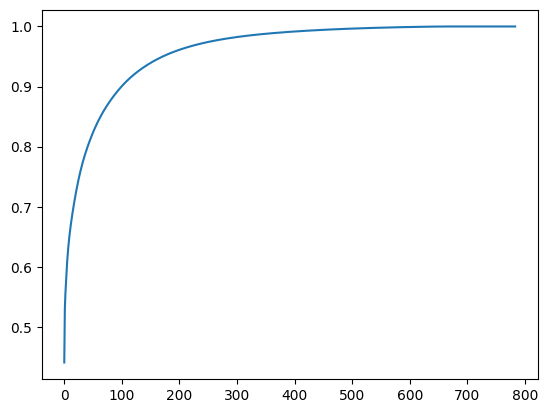

In [16]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [17]:
pca = PCA(n_components=200)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

knn = KNeighborsClassifier()

knn.fit(x_train_trf,y_train)
y_pred= knn.predict(x_test_trf)

print(accuracy_score(y_pred,y_test))

0.9511904761904761


In [18]:
test.shape

(28000, 784)

In [19]:
test_trf = pca.transform(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [20]:
x_test_trf.shape

(8400, 200)

In [21]:
result = knn.predict(test_trf)

In [22]:
submission = pd.DataFrame(result, columns = ['Label']) 

In [23]:
submission.index = range(1, len(submission)+1)

In [24]:
submission.index.name = 'ImageId'

In [25]:
submission.head()

,Label
ImageId,
1,2
2,0
3,8
4,0
5,3


In [26]:
submission.to_csv('submission.csv')

In [27]:
submission.head()

,Label
ImageId,
1,2
2,0
3,8
4,0
5,3
